# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Import API key
api_key = "API_KEY"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)

617

In [3]:
# create lists to store information
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
countries = []
cities_set = []


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# create count and set variables to keep track
count = 1
set_one = 1

# create base URL for API call
query_url =  "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + api_key

# perform API call
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')
for city in cities: 
    
    # create response variable 
    response = requests.get(f"{query_url}&q={city}").json()
    
    # try statement to populate data
    try: 
        # print confirmation message
        print(f'Processing Weather Data for Record {count} of Set {set_one} | {response["name"]}')
        
        # add data to DataFrame
        cities_set.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        
        # increase record count
        count += 1
    
    # except statement for cities not found
    except:
        print("City not found....Skipping............")
    
    
    # if statement to create sets of 50
    if count > 50:
        set_one += 1
        count = 1

        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')


-----------------------------
Beginning Data Retrieval
-----------------------------
City not found....Skipping............
Processing Weather Data for Record 1 of Set 1 | Rikitea
Processing Weather Data for Record 2 of Set 1 | Tuktoyaktuk
Processing Weather Data for Record 3 of Set 1 | Georgiyevka
Processing Weather Data for Record 4 of Set 1 | Saint-Joseph
Processing Weather Data for Record 5 of Set 1 | Hobyo
Processing Weather Data for Record 6 of Set 1 | Presidencia Roque Sáenz Peña
Processing Weather Data for Record 7 of Set 1 | Lorengau
Processing Weather Data for Record 8 of Set 1 | Ushuaia
Processing Weather Data for Record 9 of Set 1 | Bluff
Processing Weather Data for Record 10 of Set 1 | Vaini
Processing Weather Data for Record 11 of Set 1 | Arraial do Cabo
Processing Weather Data for Record 12 of Set 1 | Aleksandrov Gay
Processing Weather Data for Record 13 of Set 1 | Mataura
Processing Weather Data for Record 14 of Set 1 | Hobart
Processing Weather Data for Record 15 of S

Processing Weather Data for Record 32 of Set 3 | Kilindoni
City not found....Skipping............
Processing Weather Data for Record 33 of Set 3 | Saint George
Processing Weather Data for Record 34 of Set 3 | Mandalī
Processing Weather Data for Record 35 of Set 3 | Eureka
Processing Weather Data for Record 36 of Set 3 | Tamale
Processing Weather Data for Record 37 of Set 3 | Pevek
Processing Weather Data for Record 38 of Set 3 | Mórrope
Processing Weather Data for Record 39 of Set 3 | Wainwright
Processing Weather Data for Record 40 of Set 3 | Husavik
Processing Weather Data for Record 41 of Set 3 | Verkhnevilyuysk
Processing Weather Data for Record 42 of Set 3 | Umm Kaddadah
Processing Weather Data for Record 43 of Set 3 | Taoudenni
Processing Weather Data for Record 44 of Set 3 | Azare
City not found....Skipping............
Processing Weather Data for Record 45 of Set 3 | Viranşehir
Processing Weather Data for Record 46 of Set 3 | Mahébourg
City not found....Skipping............
Proc

Processing Weather Data for Record 14 of Set 6 | Winslow
Processing Weather Data for Record 15 of Set 6 | Amapá
Processing Weather Data for Record 16 of Set 6 | Santa Cruz de la Sierra
Processing Weather Data for Record 17 of Set 6 | Ambon City
Processing Weather Data for Record 18 of Set 6 | São João da Barra
Processing Weather Data for Record 19 of Set 6 | Fort Nelson
Processing Weather Data for Record 20 of Set 6 | Lebu
Processing Weather Data for Record 21 of Set 6 | Okahandja
Processing Weather Data for Record 22 of Set 6 | Esperance
Processing Weather Data for Record 23 of Set 6 | Strandby
Processing Weather Data for Record 24 of Set 6 | Olafsvik
Processing Weather Data for Record 25 of Set 6 | Zaysan
Processing Weather Data for Record 26 of Set 6 | Colquiri
Processing Weather Data for Record 27 of Set 6 | Bijie
Processing Weather Data for Record 28 of Set 6 | Usinsk
Processing Weather Data for Record 29 of Set 6 | Camabatela
Processing Weather Data for Record 30 of Set 6 | Borås

Processing Weather Data for Record 1 of Set 9 | Katobu
Processing Weather Data for Record 2 of Set 9 | Gamba
Processing Weather Data for Record 3 of Set 9 | Sulangan
Processing Weather Data for Record 4 of Set 9 | Saint-Augustin
Processing Weather Data for Record 5 of Set 9 | Zheleznodorozhnyy
Processing Weather Data for Record 6 of Set 9 | That Phanom
Processing Weather Data for Record 7 of Set 9 | Kemijärvi
Processing Weather Data for Record 8 of Set 9 | Øksfjord
Processing Weather Data for Record 9 of Set 9 | Susanville
Processing Weather Data for Record 10 of Set 9 | Torbay
City not found....Skipping............
Processing Weather Data for Record 11 of Set 9 | Sharan
Processing Weather Data for Record 12 of Set 9 | Les Cayes
Processing Weather Data for Record 13 of Set 9 | Nago
Processing Weather Data for Record 14 of Set 9 | Hatta
Processing Weather Data for Record 15 of Set 9 | Sakakah
Processing Weather Data for Record 16 of Set 9 | Pisco
Processing Weather Data for Record 17 of

Processing Weather Data for Record 33 of Set 11 | Veinticinco de Mayo
Processing Weather Data for Record 34 of Set 11 | Tautira
Processing Weather Data for Record 35 of Set 11 | Sorgun
Processing Weather Data for Record 36 of Set 11 | Tomatlán
Processing Weather Data for Record 37 of Set 11 | Genhe
Processing Weather Data for Record 38 of Set 11 | Le Port
City not found....Skipping............
Processing Weather Data for Record 39 of Set 11 | Marovoay
Processing Weather Data for Record 40 of Set 11 | Curanilahue
Processing Weather Data for Record 41 of Set 11 | Vestmannaeyjar
Processing Weather Data for Record 42 of Set 11 | Ixtapa
Processing Weather Data for Record 43 of Set 11 | Udachny
City not found....Skipping............
Processing Weather Data for Record 44 of Set 11 | Lewiston
Processing Weather Data for Record 45 of Set 11 | Laguna
Processing Weather Data for Record 46 of Set 11 | Anito
Processing Weather Data for Record 47 of Set 11 | Santa Maria
Processing Weather Data for R

In [5]:
# set variable aside for plots
L = len(cities_set)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
# create DataFrame
weather_df = pd.DataFrame({'City': cities_set,
                           'Lat':lat,
                           'Lng':lng,
                           'Max Temp (F)':max_temp, 
                           'Humidity (%)':humidity,
                           'Cloudiness (%)': cloudiness,
                           'Wind Speed (MPH)': wind_speed,
                           'Country': countries,
                           'Date':date})

# checkpoint print
weather_df

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,Rikitea,-23.1203,-134.9692,77.23,73,96,12.59,PF,1612728440
1,Tuktoyaktuk,69.4541,-133.0374,-25.60,75,75,13.80,CA,1612728622
2,Georgiyevka,43.0369,74.7114,39.20,81,100,4.47,KZ,1612728622
3,Saint-Joseph,-21.3667,55.6167,80.60,74,90,4.61,RE,1612728137
4,Hobyo,5.3505,48.5268,78.10,78,0,17.29,SO,1612728370
...,...,...,...,...,...,...,...,...,...
560,Manta,-0.9500,-80.7333,84.20,70,75,8.05,EC,1612728784
561,Suoyarvi,62.0833,32.3500,3.02,94,97,4.74,RU,1612728784
562,Aného,6.2333,1.6000,84.20,84,20,13.80,TG,1612728784
563,Ostrovnoy,68.0531,39.5131,7.07,93,100,10.36,RU,1612728784


In [7]:
# describe data
weather_df.describe()

,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.935301,17.005930,50.358602,71.895575,55.046018,8.543823,1.612729e+09
std,33.658812,90.916479,32.924650,19.909050,41.206124,5.877336,1.985018e+02
min,-54.800000,-179.166700,-37.610000,6.000000,0.000000,0.200000,1.612728e+09
25%,-8.103000,-65.712500,26.600000,62.000000,5.000000,4.000000,1.612729e+09
50%,23.228100,23.700000,62.010000,76.000000,75.000000,7.720000,1.612729e+09
75%,49.752900,93.450000,77.230000,87.000000,98.000000,11.500000,1.612729e+09
max,78.218600,179.316700,98.940000,100.000000,100.000000,49.480000,1.612729e+09


In [8]:
# save output file
weather_df.to_csv("output_data/weather_df.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# as seen in the describe table, the max humidity was 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

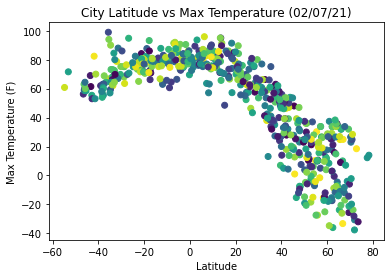

In [10]:
# latitude vs. Temperature scatterplot

# format plot
colors = np.random.rand(L)

# set x & y axis and labels
plt.scatter(lat, max_temp, c=colors)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (02/07/21)')

# save output
plt.savefig('Images/latvstemp.png')

## Latitude vs. Humidity Plot

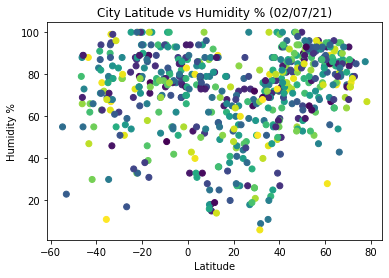

In [11]:
# latitude vs. Humidity scatterplot

# format plot
colors = np.random.rand(L)

# set x & y axis and labels
plt.scatter(lat, humidity, c=colors)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs Humidity % (02/07/21)')

# save output
plt.savefig('Images/latvshumidity.png')

## Latitude vs. Cloudiness Plot

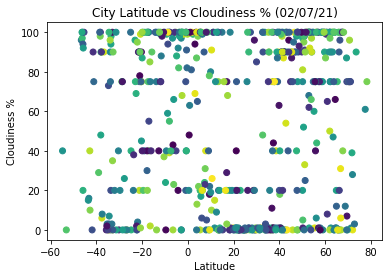

In [12]:
# latitude vs. cloudiness scatterplot

# format plot
colors = np.random.rand(L)

# set x & y axis and labels
plt.scatter(lat, cloudiness, c=colors)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs Cloudiness % (02/07/21)')

# save output
plt.savefig('Images/latvscloudiness.png')

## Latitude vs. Wind Speed Plot

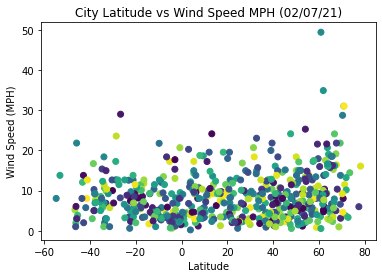

In [13]:
# latitude vs. wind speed scatterplot

# format plot
colors = np.random.rand(L)

# set x & y axis and labels
plt.scatter(lat, wind_speed, c=colors)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('City Latitude vs Wind Speed MPH (02/07/21)')

# save output
plt.savefig('Images/latvswindspeed.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
# create new dataframe for only Northen Hemisphere
northern_hemisphere = weather_df.loc[weather_df['Lat'] >= 0]

# set variable aside for plots
N = len(northern_hemisphere)

The correlation between the two factors is -0.87.
The r-squared is: 0.75


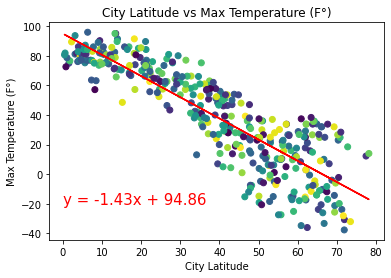

In [15]:
# run linear regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# format plot
colors = np.random.rand(N)
plt.scatter(x_values,y_values, c=colors)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F°)')
plt.title('City Latitude vs Max Temperature (F°)')

# r-squared & correlation
corr = st.pearsonr(x_values,y_values)

print(f'The correlation between the two factors is {round(corr[0],2)}.')
print(f"The r-squared is: {round((rvalue**2),2)}")

# save output
plt.savefig('Images/nh_temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
# create new DataFrame for southern hemisphere
southern_hemisphere = weather_df.loc[weather_df['Lat'] <= 0]

# set variable aside for plots
S = len(southern_hemisphere)

The correlation between the two factors is 0.58.
The r-squared is: 0.34


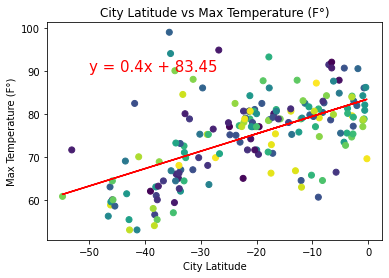

In [17]:
# run linear regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# format plot
colors = np.random.rand(S)
plt.scatter(x_values,y_values, c=colors)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F°)')
plt.title('City Latitude vs Max Temperature (F°)')

# r-squared & correlation
corr = st.pearsonr(x_values,y_values)

print(f'The correlation between the two factors is {round(corr[0],2)}.')
print(f"The r-squared is: {round((rvalue**2),2)}")

# save output
plt.savefig('Images/sh_temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between the two factors is 0.39.
The r-squared is: 0.15


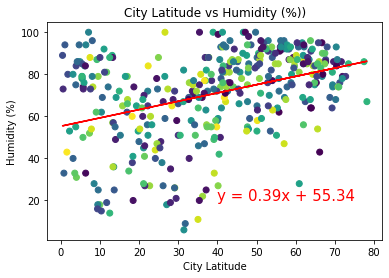

In [18]:
# run linear regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# format plot
colors = np.random.rand(N)
plt.scatter(x_values,y_values, c=colors)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (%))')

# r-squared & correlation
corr = st.pearsonr(x_values,y_values)

print(f'The correlation between the two factors is {round(corr[0],2)}.')
print(f"The r-squared is: {round((rvalue**2),2)}")

# save output
plt.savefig('Images/nh_humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between the two factors is 0.17.
The r-squared is: 0.03


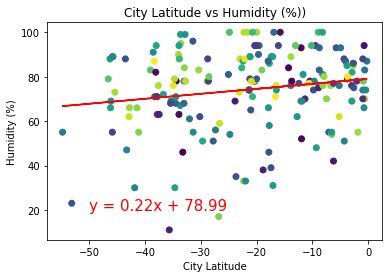

In [19]:
# run linear regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# format plot
colors = np.random.rand(S)
plt.scatter(x_values,y_values, c=colors)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 20),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (%))')

# r-squared & correlation
corr = st.pearsonr(x_values,y_values)

# save output
plt.savefig('Images/sh_humidity.png')

print(f'The correlation between the two factors is {round(corr[0],2)}.')
print(f"The r-squared is: {round((rvalue**2),2)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between the two factors is 0.22.
The r-squared is: 0.05


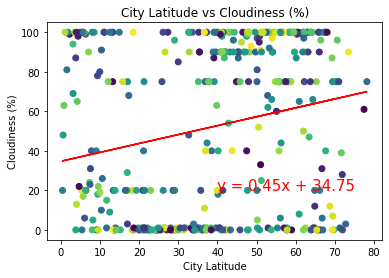

In [20]:
# run linear regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# format plot
colors = np.random.rand(N)
plt.scatter(x_values,y_values, c=colors)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 20),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (%)')

# r-squared & correlation
corr = st.pearsonr(x_values,y_values)

# save output
plt.savefig('Images/nh_cloudiness.png')

print(f'The correlation between the two factors is {round(corr[0],2)}.')
print(f"The r-squared is: {round((rvalue**2),2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between the two factors is 0.23.
The r-squared is: 0.05


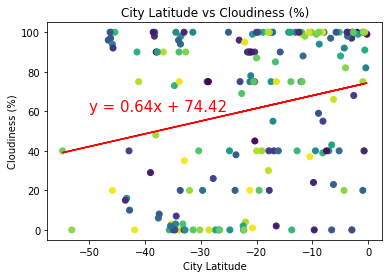

In [21]:
# run linear regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# format plot
colors = np.random.rand(S)
plt.scatter(x_values,y_values, c=colors)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 60),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (%)')

# r-squared & correlation
corr = st.pearsonr(x_values,y_values)

# save output
plt.savefig('../Images/sh_cloudiness.png')

# print r-squared & correlation
print(f'The correlation between the two factors is {round(corr[0],2)}.')
print(f"The r-squared is: {round((rvalue**2),2)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between the two factors is 0.19.
The r-squared is: 0.04


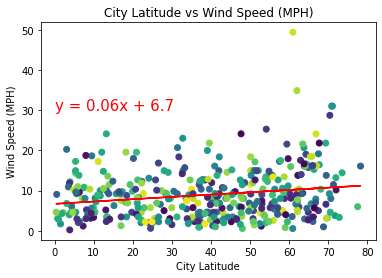

In [22]:
# run linear regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed (MPH)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# format plot
colors = np.random.rand(N)
plt.scatter(x_values,y_values, c=colors)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('City Latitude vs Wind Speed (MPH)')

# r-squared & correlation
corr = st.pearsonr(x_values,y_values)

# save output
plt.savefig('Images/nh_windspeed.png')

# print statements
print(f'The correlation between the two factors is {round(corr[0],2)}.')
print(f"The r-squared is: {round((rvalue**2),2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between the two factors is -0.14.
The r-squared is: 0.02


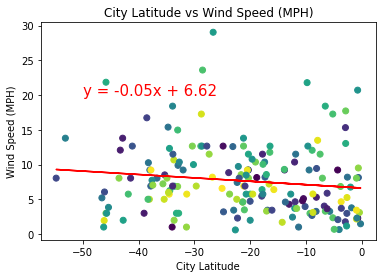

In [23]:
# run linear regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed (MPH)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# format plot
colors = np.random.rand(S)
plt.scatter(x_values,y_values, c=colors)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 20),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('City Latitude vs Wind Speed (MPH)')

# r-squared & correlation
corr = st.pearsonr(x_values,y_values)

# save output
plt.savefig('Images/sh_windspeed.png')

# print statements
print(f'The correlation between the two factors is {round(corr[0],2)}.')
print(f"The r-squared is: {round((rvalue**2),2)}")